In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [31]:
len(words)

32033

In [4]:
#building the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
#build the dataset

block_size = 3 #contex length: how many characters do we take to predict the next one?
X, Y = [], []  # X are inputs and Y are label of each input
for w in words[:5]:
    
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] #crop and append 
    
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [21]:
#build the dataset

block_size = 3 #contex length: how many characters do we take to predict the next one?
X, Y = [], []  # X are inputs and Y are label of each input
for w in words:
    
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] #crop and append 
    
X = torch.tensor(X)
Y = torch.tensor(Y)

In [22]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [23]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [24]:
for p in parameters:
  p.requires_grad = True

In [25]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [26]:
#to find good learning rate we start from low learning rate and go up 

lri = []
lossi = []

for i in range(1000):
    
    #minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())

#print(loss.item())

17.389362335205078
19.795995712280273
20.2491455078125
16.460721969604492
23.532062530517578
22.692691802978516
24.075912475585938
19.280750274658203
18.184444427490234
19.097654342651367
18.715938568115234
16.46940040588379
21.08852767944336
19.04102325439453
18.289031982421875
21.469327926635742
19.73164939880371
17.78672218322754
20.781614303588867
18.579038619995117
19.130613327026367
17.613142013549805
20.505735397338867
17.63129234313965
21.172420501708984
18.663005828857422
15.289715766906738
18.35478973388672
17.063297271728516
16.26197624206543
17.460514068603516
17.471651077270508
19.96312713623047
19.72478675842285
19.06459617614746
18.47568702697754
14.894269943237305
17.542085647583008
17.587175369262695
20.228469848632812
21.057477951049805
15.580257415771484
21.585248947143555
18.63189697265625
16.995223999023438
19.02337074279785
16.786602020263672
16.442930221557617
16.91057777404785
19.814861297607422
17.13050651550293
17.097055435180664
16.45189094543457
16.179199218

4.211122989654541
4.34131383895874
3.8038883209228516
3.889962673187256
3.411437511444092
2.674730062484741
3.284289836883545
3.139676094055176
4.03419303894043
2.900622606277466
2.6380581855773926
4.062544822692871
2.7895665168762207
3.1983842849731445
3.298170804977417
4.077709674835205
4.047743797302246
2.7006847858428955
3.9015190601348877
4.044565200805664
3.220982074737549
3.17183518409729
3.209390878677368
4.266749382019043
3.515127420425415
3.0780208110809326
3.9404754638671875
3.4826271533966064
2.7396926879882812
3.6766560077667236
4.423483371734619
3.940910577774048
3.4583399295806885
2.7584469318389893
3.0872719287872314
4.041022300720215
3.1821486949920654
3.893812894821167
3.5435519218444824
4.415778636932373
3.002248525619507
3.3120806217193604
3.9008755683898926
3.630465030670166
3.153799533843994
3.8331098556518555
3.3805105686187744
3.3636302947998047
3.8936972618103027
3.519270658493042
2.7832963466644287
3.4233715534210205
3.750225067138672
2.6845593452453613
3.5728

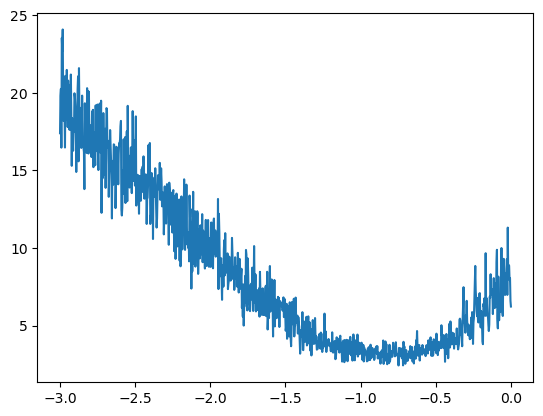

In [27]:
#now in the plot we can see learning rate on x axis and loss on y axis
plt.plot(lri, lossi)

#we can see somewhere between -1.0 and -0.5 is good place and -1 power of 10 is -0.1

In [33]:
#now we found the good learning rate

#build the dataset

def build_dataset(words):
    block_size = 3 #contex length: how many characters do we take to predict the next one?
    X, Y = [], []  # X are inputs and Y are label of each input
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] #crop and append 

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1]) #until the n1 which we have 25626 example in training set
Xdev, Ydev = build_dataset(words[n1:n2]) #n2 - n1 3203 example for dev
Xte, Yte = build_dataset(words[n2:]) #len(words) - n2 = 3204 word in test set

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [29]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [34]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [35]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [36]:
for p in parameters:
  p.requires_grad = True

In [37]:
# now we just trainning on train set

for i in range(30000):
    
    #minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad


In [38]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3970, grad_fn=<NllLossBackward0>)

In [39]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4137, grad_fn=<NllLossBackward0>)

In [ ]:
#so our training set and dev set loss are about equal so we're not over fitting
#this means that model is not powerful enough to just purely memorizing the data and so far we are underfitting 
#because the training loss and the dev loss are roughly equal so what that means in that our network is very tiny 
#and we expect to make performance improvements by scaling up the size of this network

In [40]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 200), generator=g) # add 100 neuron
b1 = torch.randn(200, generator=g) # add 100 bias
W2 = torch.randn((200, 27), generator=g) #add 100 to the input of final layer
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [41]:
sum(p.nelement() for p in parameters) #number of parameters now is 6781

6881

In [42]:
for p in parameters:
  p.requires_grad = True

In [43]:
lri = []
lossi = []
stepi = []

for i in range(30000):
    
    #minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats
    stepi.append(i)
    lossi.append(loss.item())

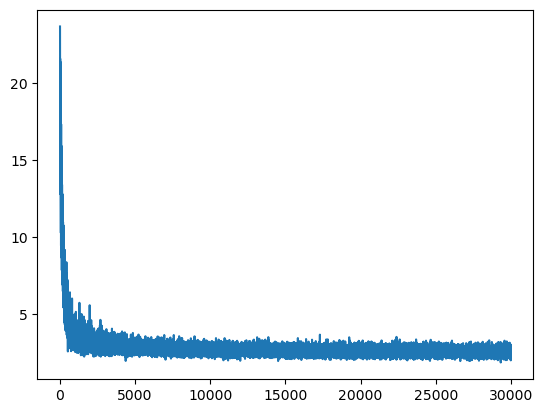

In [44]:
plt.plot(stepi, lossi) #the thikness of the graph is due to optimizin the minibatch which create some noise

In [45]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.5155, grad_fn=<NllLossBackward0>)

2.4955 after 30000 with 0.1 (learning rate)
2.4193 after 30000
2.3319 after 30000 with 0.05
2.2876 after 30000 with 0.05
2.2264 after 30000 with 0.01

In [46]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.5262, grad_fn=<NllLossBackward0>)

2.4982 after 30000 with 0.1
2.4217 after another 30000
2.3338 after 30000 with 0.05
2.2931 after 30000 with 0.05
2.2351 after 30000 with 0.01

In [ ]:
#another point to consider is that even though we increase the size of tanh layer it could be that the bottleneck of 
#our network are the embedding which are currently 2-dimentional basically we cramming way too many characters into
#just 2-dimentions and as result neural net is not able to really use that space effectively

In [48]:
#now lets increase embedding size 
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) # chnage from 2 to 10
W1 = torch.randn((30, 200), generator=g) # 3*10 = 30
b1 = torch.randn(200, generator=g) 
W2 = torch.randn((200, 27), generator=g) 
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [49]:
sum(p.nelement() for p in parameters) #number of parameters now is 11897

11897

In [50]:
for p in parameters:
  p.requires_grad = True

In [51]:
lri = []
lossi = []
stepi = []

In [52]:

for i in range(30000):
    
    #minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) #chnage 6 to 30
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item()) #we use log to squash our graph so we have better view

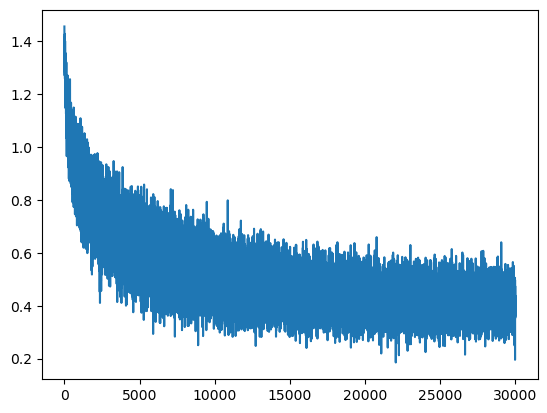

In [53]:
plt.plot(stepi, lossi)

In [54]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.5294, grad_fn=<NllLossBackward0>)

2.4246 after 30000 with 0.1
2.4041 after 30000
2.2459 after 30000 with 0.05
2.2218 after 30000 with 0.05
2.1484 after 30000 with 0.01

In [55]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.5675, grad_fn=<NllLossBackward0>)

2.4487 after 30000 with 0.1
2.4205 after 30000
2.2728 after 30000 with 0.05
2.2544 after 30000 with 0.05
2.1838 after 30000 with 0.01

In [56]:
#but first lets first try one more 


for i in range(200000):
    
    #minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) #chnage 6 to 30
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item()) #we use log to squash our graph so we have better view

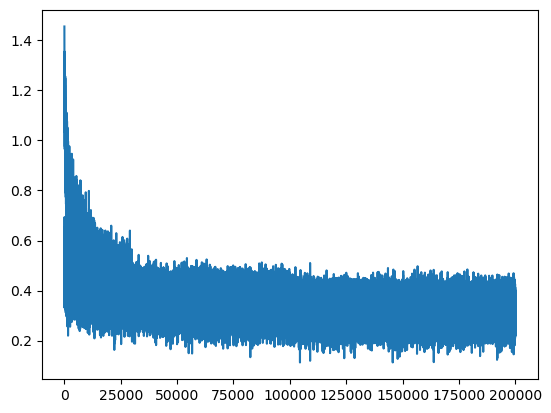

In [57]:
plt.plot(stepi, lossi)

In [58]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1079, grad_fn=<NllLossBackward0>)

In [59]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1592, grad_fn=<NllLossBackward0>)

In [60]:
g = torch.Generator().manual_seed(2147483647 + 10) # for reproducibility
for _ in range(20):
    
    out = []
    context = [0] * block_size #initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
            
    print(''.join(itos[i] for i in out))

carmahzato.
harli.
jarri.
taty.
skanden.
jazonte.
deliah.
jarqui.
nellara.
chaily.
kaleigh.
ham.
joce.
quint.
sulin.
alianni.
wanelo.
dearyxix.
kael.
dura.
